In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import time
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.lines import Line2D
import scipy.stats as stats 

# colors obtained here
# https://davidmathlogic.com/colorblind/#%23000000-%23E69F00-%2356B4E9-%23009E73-%23F0E442-%230072B2-%23D55E00-%23CC79A7

In [2]:
df_bot_accounts = pd.read_csv('data/bots.csv')
all_phrases = ['2 days','3 days','4 days','5 days','7 days','10 days',
               '2 weeks','3 weeks','4 weeks','6 weeks',
              '2 months','3 months','4 months','5 months','6 months','12 months',
              '2 years','3 years','4 years','5 years','10 years','20 years','30 years']

# Read all of the filenames
all_sents = [f for f in listdir('data/VADER/') if isfile(join('data/VADER/', f))]
all_sents = ["data/VADER/"+f for f in all_sents if f[len(f)-4:]== ".csv"]

df = pd.read_csv(all_sents[0])
df['phrase'] = all_sents[0][11:all_sents[0].index('_')]
df = df[['tweet_id','created_at','phrase','vader']]

for i in all_sents[1:]:
    df_1 = pd.read_csv(i)
    df_1['phrase'] = i[11:i.index('_')]

    df_1 = df_1[['tweet_id','created_at','phrase','vader']]
    df = pd.concat([df,df_1])

# Drop neutral vader, NA, and any duplicates
df = df.loc[df.vader!=0]
df.created_at = pd.to_datetime(df['created_at'])
df = df.dropna(subset=['vader'])
df = df.drop_duplicates()
df = df.loc[~df.tweet_id.isin(list(df_bot_accounts.tweet_id))]


/Users/calvinisch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


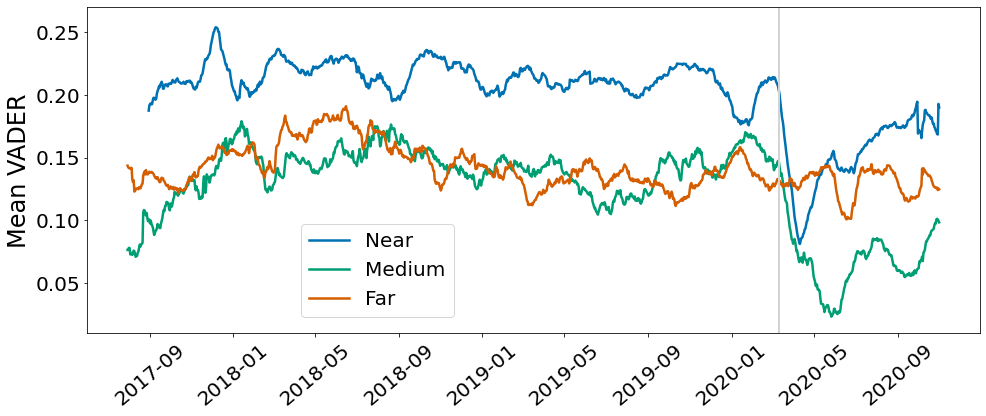

In [4]:
p_d = ['2-days','3-days','4-days','5-days','7-days','10-days','2-weeks','3-weeks','4-weeks']
p_w = ['6-weeks','2-months','3-months','4-months','5-months','6-months']
p_m = ['12-months','2-years','3-years','4-years','5-years','10-years','20-years','30-years']
a = ['Near','Medium','Far']
ps = [p_d,p_w,p_m]
df_counts = pd.DataFrame({'created_at':[],'vader':[],'phrase':[]})
for p in range(len(ps)):
    df_temp = df.loc[df.phrase.isin(ps[p])]
    df_temp = df_temp[['created_at','vader']].resample('d', on='created_at').mean().dropna(how='all')
    df_temp.Sentiment = (df_temp['vader'] - df_temp['vader'].mean())/df_temp['vader'].std(ddof=0)
    df_temp['phrase'] = a[p]
    df_temp['created_at'] = df_temp.index
    df_temp = df_temp.reset_index(drop=True)
    df_counts = pd.concat([df_counts,df_temp],sort=False)
df_counts = df_counts.iloc[31:]
    
fig, axs = plt.subplots(1, 1,figsize=(16,6))
df_2 = df_counts.loc[df_counts.phrase == 'Near'][['created_at','vader']]
df_2['MA'] = df_2.rolling(window=30).mean()
axs.plot(df_2['created_at'],df_2['MA'], label='Near',color = '#0072B2',lw=2.5)

df_2 = df_counts.loc[df_counts.phrase == 'Medium'][['created_at','vader']]
df_2['MA'] = df_2.rolling(window=30).mean()
axs.plot(df_2['created_at'],df_2['MA'], label='Medium',color = '#009E73', lw=2.5)

df_2 = df_counts.loc[df_counts.phrase == 'Far'][['created_at','vader']]
df_2['MA'] = df_2.rolling(window=30).mean()
axs.plot(df_2['created_at'],df_2['MA'], label='Far', color = '#D55E00', lw=2.5)

axs.set_ylim([.01,.27])
axs.plot([pd.to_datetime('2020-03-11 00:00:00+00:00'), pd.to_datetime('2020-03-11 00:00:00+00:00')], [0, .28], '-', color = '#d3d3d3', lw=2)


axs.set_ylabel('Mean VADER',fontsize=24)
axs.legend(fontsize=20, loc=(.24,.05))
for label in axs.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('center')

axs.tick_params(labelsize=20)
plt.savefig('SI-plots/Mean-Vader-near-med-far.png',dpi=400,bbox_inches='tight')
plt.show()

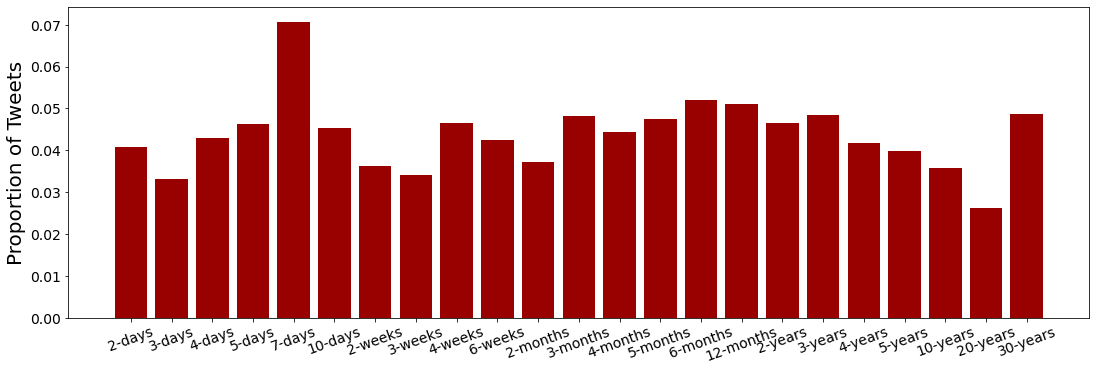

In [8]:
# Read all of the filenames
df = pd.read_csv(all_sents[0])
df['phrase'] = all_sents[0][11:all_sents[0].index('_')]
df = df[['tweet_id','created_at','phrase','vader']]
for i in all_sents[1:]:
    df_1 = pd.read_csv(i)
    df_1['phrase'] = i[11:i.index('_')]
    df_1 = df_1[['tweet_id','created_at','phrase','vader']]
    df = pd.concat([df,df_1])

df = df.loc[df.vader!=0]
df.created_at = pd.to_datetime(df['created_at'])
df = df.dropna(subset=['vader'])
df_bots = df.copy()
df = df.loc[~df.tweet_id.isin(list(df_bot_accounts.tweet_id))]

dif_counts = []
dif_counts_props = []
all_phrases = ['2-days','3-days','4-days','5-days','7-days','10-days',
               '2-weeks','3-weeks','4-weeks','6-weeks',
              '2-months','3-months','4-months','5-months','6-months','12-months',
              '2-years','3-years','4-years','5-years','10-years','20-years','30-years']
for p in all_phrases:
    all_tweets = df_bots.loc[df_bots['phrase'] == p].vader.count()
    bots_removed = df.loc[df['phrase'] == p].vader.count()
    
    dif_counts.append(all_tweets - bots_removed)
    dif_counts_props.append((all_tweets - bots_removed) / all_tweets)
    

bars = ('2 days','3 days','4 days','5 days','7 days','10 days',
               '2 weeks','3 weeks','4 weeks','6 weeks',
              '2 months','3 months','4 months','5 months','6 months','12 months',
              '2 years','3 years','4 years','5 years','10 years','20 years','30 years')
y_pos = np.arange(len(bars))

# Create the figure
fig, axs = plt.subplots(1, 1,figsize=(16,6))
fig.tight_layout(pad=5)
axs.bar(y_pos, dif_counts_props,color = "#990000")
axs.set_xticks(y_pos)
axs.set_xticklabels(all_phrases, rotation= 20) 
axs.tick_params(labelsize=14)
axs.set_ylabel('Proportion of Tweets',fontsize=20)

plt.savefig('SI-plots/bot-tweets-per-phrase.png',dpi=400)
plt.show()


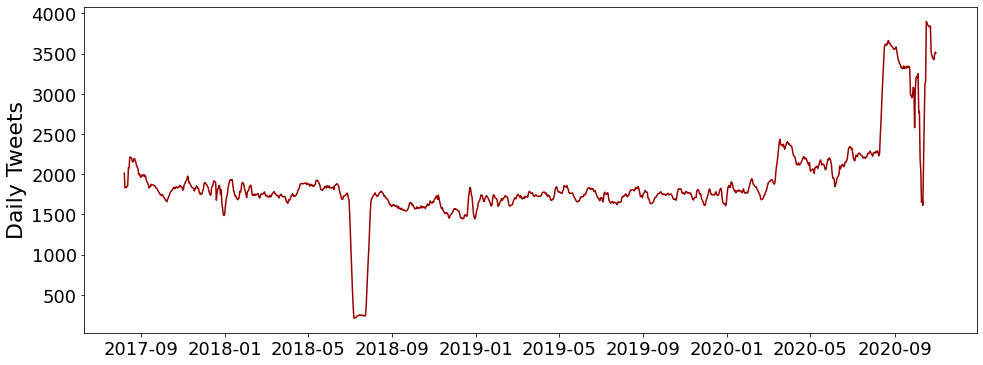

In [9]:
# Helper function to get the counts of all dates
def get_counts():
    df_counts = pd.DataFrame({'created_at':[],'count':[]})

    # For each file
    for f in all_sents:

        # Read in a file
        df_temp = pd.read_csv(f)

        # Remove 0 sentiment:
        df_temp = df_temp.loc[df_temp['vader'] != 0]
        
        # Drop duplicates if they exist
        df_temp = df_temp.drop_duplicates()

        # Change to date-time and group by date
        s = pd.to_datetime(df_temp['created_at'])
        df_temp = s.groupby(s.dt.floor('d')).size().reset_index(name='count')
        
        df_counts = pd.concat([df_counts,df_temp])
    
    return df_counts

df_counts = get_counts()

df_2 = df_counts.groupby('created_at', as_index = False)['count'].sum()
df_2 = df_2.loc[df_2.created_at >= '2017-08-01']
fig, axs = plt.subplots(1, 1,figsize=(16,6))
df_2['MA'] = df_2.rolling(window=7).mean()
axs.set_ylabel('Daily Tweets',fontsize=22)
axs.plot(df_2['created_at'],df_2['MA'], color = '#990000')

axs.tick_params(labelsize=18)
plt.savefig("SI-plots/Tweets_over_time_(MA)",dpi=400)
plt.show()

In [11]:
# Plot them all months individually
# Helper function to get log x values
def get_x():
    x_1 = [2,3,4,5,7,10,14,21,28,42,60,90,120,150,180,365,730,3*365,4*365,5*365,10*365,20*365,30*365]
    x = [np.log10(n) for n in x_1]  
    return(x)

# Helper function to load a specific month
def get_range(t_1,t_2):
    
    df_range = df.copy()

    # Select only tweets in these dates
    mask = (pd.Timestamp(t_1+' 00:00:00+0000') <= df_range['created_at']) & (df_range['created_at'] < pd.Timestamp(t_2+' 00:00:00+0000'))
    df_range = df_range.loc[mask]

    return df_range

# Helper function for confidence intervals
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return h

 
-0.02866 x + 0.2314
 
-0.01456 x + 0.1512


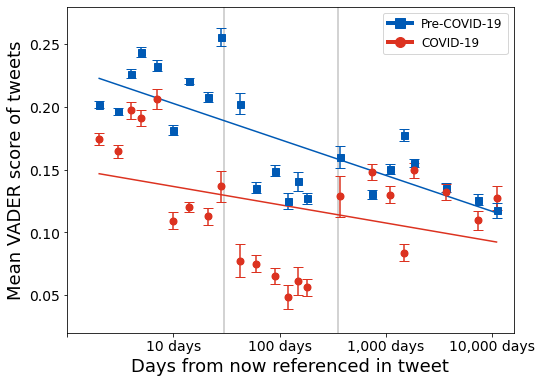

In [20]:
# responding comment

# Plot March 2019 and 2020
fig, axs = plt.subplots(1, 1,figsize=(8,6))

# Get all phrases and x locations in log of days
x = get_x()
all_phrases = ['2-days','3-days','4-days','5-days','7-days','10-days',
               '2-weeks','3-weeks','4-weeks','6-weeks',
              '2-months','3-months','4-months','5-months','6-months','12-months',
              '2-years','3-years','4-years','5-years','10-years','20-years','30-years']

axs.plot([np.log10(30), np.log10(30)], [0, .3], '-', color = '#d3d3d3', lw=2)
axs.plot([np.log10(350), np.log10(350)], [0, .3], '-', color = '#d3d3d3', lw=2)

# Plot 2019
df_main = get_range("2017-08-01", "2020-03-11") # 2018-03
all_tweets = [df_main.loc[df_main['phrase'] == phrase]['vader'].mean() for phrase in all_phrases]
all_e = [mean_confidence_interval(df_main.loc[df_main['phrase'] == phrase]['vader']) for phrase in all_phrases]
coef = np.polyfit(x,all_tweets,1)
poly1d_fn = np.poly1d(coef) 
print(poly1d_fn)
axs.errorbar(x, all_tweets, all_e, linestyle='None', marker='s', ecolor="#005AB5", mec="#005AB5", mfc="#005AB5", mew=1, ms=7, capsize=5)
axs.plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color="#005AB5")


# Plot 2020
df_main = get_range("2020-03-11", "2020-10-31") #2020 - 03-11
all_tweets = [df_main.loc[df_main['phrase'] == phrase]['vader'].mean() for phrase in all_phrases]
all_e = [mean_confidence_interval(df_main.loc[df_main['phrase'] == phrase]['vader']) for phrase in all_phrases]
coef = np.polyfit(x,all_tweets,1)
poly1d_fn = np.poly1d(coef) 
print(poly1d_fn)
axs.errorbar(x, all_tweets, all_e, linestyle='None', marker='o', ecolor="#DC3220", mec="#DC3220", mfc="#DC3220", mew=1, ms=7, capsize=5)
axs.plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color="#DC3220")

#axs.axvspan(0, np.log10(30), facecolor='#56B4E9', alpha=0.2)
#axs.axvspan(np.log10(30), np.log10(350), facecolor='#009E73', alpha=0.2)
#axs.axvspan(np.log10(350), 4.2, facecolor='#F0E442', alpha=0.2)
axs.set_xlim(0,4.2)
axs.set_ylim(0.02,.28)

# Labels
plt.ylabel('Mean VADER score of tweets', fontsize = 18)
plt.xlabel("Days from now referenced in tweet", fontsize = 18)
custom_lines = [Line2D([0], [0], marker='s', color='#005AB5',  lw=4,markersize=10),
                Line2D([0], [0], marker='o', color='#DC3220', lw=4, markersize=10)]
axs.legend(custom_lines,["Pre-COVID-19","COVID-19"],fontsize = 12)
plt.xticks(np.arange(5), ('','10 days', '100 days','1,000 days','10,000 days'))
axs.tick_params(labelsize=14)

plt.savefig('SI-plots/Sentiment-Yield-Curve-Typical-Inverted-all.png',dpi=400)
plt.show()

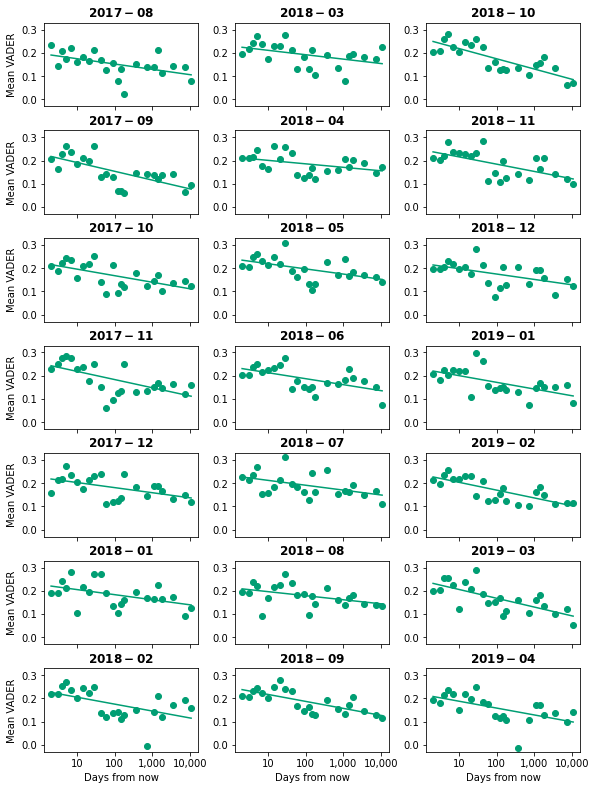

In [15]:


all_months = []
for m in ['08','09','10','11','12']:
    all_months.append('2017-'+m+"-01")
for y in ['2018','2019']:
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        all_months.append(y+'-'+m+"-01")
for m in ['01','02','03','04']:
    all_months.append('2019-'+m+"-01")

# Get their positions in the figure
fig_row = []
fig_col = []
for j in [0,1,2]:
    for i in [0,1,2,3,4,5,6]:
        fig_col.append(j)
        fig_row.append(i)

# Get some seperate colors
cols = ['#009E73' for i in range(36)]
        
# Create a figure with the appropriate amount of slots
fig, axs = plt.subplots(7, 3,figsize=(8,10.5)) # 9 by 12 before
fig.tight_layout(pad=0.3)

# Get the X axis in log scale
x = get_x()

# For all of those months
for i in range(21):
    # Get the appropriate month
    df_main = get_range(all_months[i], all_months[i + 1])
    
    # Find the means
    all_tweets = [df_main.loc[df_main['phrase'] == phrase].vader.mean() for phrase in all_phrases]
    
    # Find the best fit 4th degree polynomial
    coef = np.polyfit(x,all_tweets,1)
    poly1d_fn = np.poly1d(coef) 
    axs[fig_row[i], fig_col[i]].set_xticklabels(('','','','',''))
    if fig_col[i] == 0:
        axs[fig_row[i], fig_col[i]].set_ylabel("Mean VADER")
    if fig_row[i] == 6:
        axs[fig_row[i], fig_col[i]].set_xlabel("Days from now")
        axs[fig_row[i], fig_col[i]].set_xticklabels(('','10','100','1,000','10,000'))

    # Plot this
    axs[fig_row[i], fig_col[i]].plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color=cols[i])
    axs[fig_row[i], fig_col[i]].set_title(r"$\bf{" + all_months[i][:len(all_months[i])-3] + "}$")
    axs[fig_row[i], fig_col[i]].set_ylim([-.03,0.33])
plt.savefig('SI-plots/All_Months-1.png', dpi = 400,bbox_inches='tight')

plt.show()

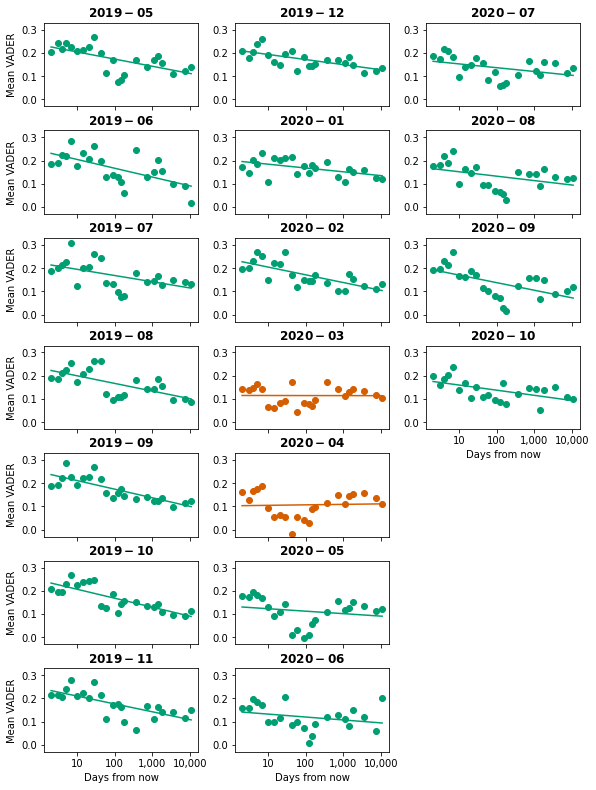

In [16]:
all_months = []
for m in ['05','06','07','08','09','10','11','12']:
    all_months.append('2019-'+m+"-01")
for m in ['01','02','03','04','05','06','07','08','09','10','11']:
    all_months.append('2020-'+m+"-01")

# Get their positions in the figure
fig_row = []
fig_col = []
for j in [0,1,2]:
    for i in [0,1,2,3,4,5,6]:
        fig_col.append(j)
        fig_row.append(i)

# Get some seperate colors
cols = ['#009E73' for i in range(10)]
for i in range(2):
    cols.append('#D55E00') 
for i in range(11):
    cols.append('#009E73') 

# Create a figure with the appropriate amount of slots
fig, axs = plt.subplots(7, 3,figsize=(8,10.5))
fig.tight_layout(pad=0.3)

# Get the X axis in log scale
x = get_x()

# For all of those months
for i in range(len(all_months)-1):
    # Get the appropriate month
    df_main = get_range(all_months[i], all_months[i + 1])
    
    # Find the means
    all_tweets = [df_main.loc[df_main['phrase'] == phrase].vader.mean() for phrase in all_phrases]
    
    # Find the best fit 4th degree polynomial
    coef = np.polyfit(x,all_tweets,1)
    poly1d_fn = np.poly1d(coef) 
    axs[fig_row[i], fig_col[i]].set_xticklabels(('','','','',''))
    if fig_col[i] == 0:
        axs[fig_row[i], fig_col[i]].set_ylabel("Mean VADER")
    if fig_row[i] == 6:
        axs[fig_row[i], fig_col[i]].set_xlabel("Days from now")
        axs[fig_row[i], fig_col[i]].set_xticklabels(('','10','100','1,000','10,000'))
    if fig_col[i] == 2 and fig_row[i] == 3:
        axs[fig_row[i], fig_col[i]].set_xlabel("Days from now")
        axs[fig_row[i], fig_col[i]].set_xticklabels(('','10','100','1,000','10,000'))
    # Plot this
    axs[fig_row[i], fig_col[i]].plot(x, all_tweets, 'yo', x, poly1d_fn(x), '-k',color=cols[i])
    axs[fig_row[i], fig_col[i]].set_title(r"$\bf{" + all_months[i][:len(all_months[i])-3] + "}$")
    axs[fig_row[i], fig_col[i]].set_ylim([-.03,0.33])
axs[4, 2].axis('off')
axs[5, 2].axis('off')
axs[6, 2].axis('off')
plt.savefig('SI-plots/All_Months-2.png', dpi = 400,bbox_inches='tight')

plt.show()

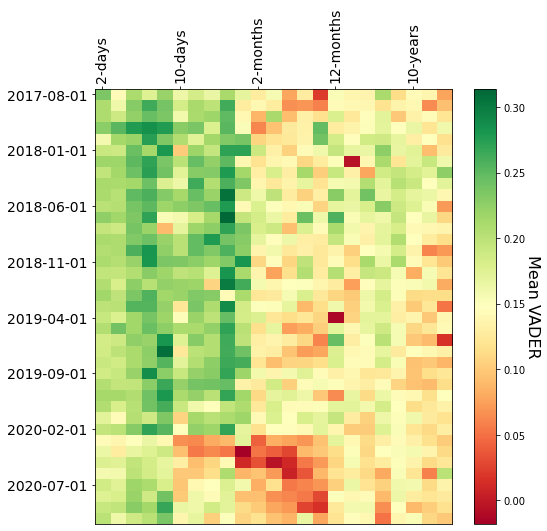

In [17]:
df_heat_map = pd.DataFrame({"date":[]})
for p in all_phrases:
    df_heat_map[p] = []
# For all of those months
all_months = []
for m in ['08','09','10','11','12']:
    all_months.append('2017-'+m+"-01")
for y in ['2018','2019']:
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        all_months.append(y+'-'+m+"-01")
for m in ['01','02','03','04','05','06','07','08','09','10','11']:
    all_months.append('2020-'+m+"-01")

for i in range(len(all_months)-1):
    # Get the appropriate month
    df_main = get_range(all_months[i], all_months[i + 1])
    means = [df_main.loc[df_main.phrase == p].vader.mean() for p in all_phrases]
    df_heat_map.loc[i] = [all_months[i]] + means
    
def heatmap2d(arr: np.ndarray):
    fig, axs = plt.subplots(1, 1,figsize=(8,8))
    im = axs.imshow(arr, cmap='RdYlGn',interpolation='nearest', aspect='auto')
    c = fig.colorbar(im)
    c.ax.set_ylabel('Mean VADER', rotation=270,fontsize=16)
    c.ax.get_yaxis().labelpad = 15
    axs.set_xticklabels(('',all_phrases[0],all_phrases[5],all_phrases[10],all_phrases[15],all_phrases[20]),rotation=90)
    axs.set_yticklabels(('',all_months[0],all_months[5],all_months[10],all_months[15],all_months[20],all_months[25],all_months[30],all_months[35]))
    axs.tick_params(labelsize=14)
    axs.xaxis.tick_top()
    plt.savefig("SI-plots/heat_map.png",dpi=400, bbox_inches='tight')
    plt.show()

heatmap2d(df_heat_map.loc[:,df_heat_map.columns != 'date'])

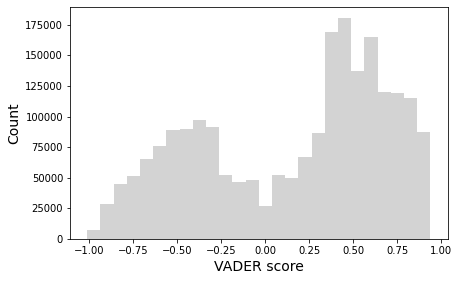

In [18]:
fig, axs = plt.subplots(1, 1,figsize=(6,4))
fig.tight_layout(pad=2.5)
plt.gcf().subplots_adjust(left=.05, top = .95)
    
axs.hist(df.vader, bins=np.arange(-1.0125, 1.0125, 0.075),color = '#d3d3d3')
axs.set_ylabel("Count", fontsize = 14)
axs.set_xlabel("VADER score", fontsize = 14)
#plt.savefig('SI-plots/hist-vader.png',dpi=400,bbox_inches='tight')
plt.show()